# LGM DATA SCIENCE INTERNSHIP - TASK-2(INTERMEDIATE LEVEL) By -Abinandan.V

# 2) Prediction using Decision Tree  Algorithm :

Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  


# IMPORTING LIBRARIES

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
iris = pd.read_csv('iris.csv')

In [25]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,103,7.1,3.0,5.9,2.1,Iris-virginica
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [26]:
iris.drop('Id',axis=1,inplace = True)

In [27]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,5.1,3.3,1.7,0.5,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
85,6.0,3.4,4.5,1.6,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


In [28]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [29]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# DATA VISUALIZATION

In [30]:
def plot_iris(col):
    sns.stripplot(x='Species',y=col,data=iris,color='white')
    sns.violinplot(x='Species',y=col,data=iris)
    plt.title('Species vs {}'.format(col))

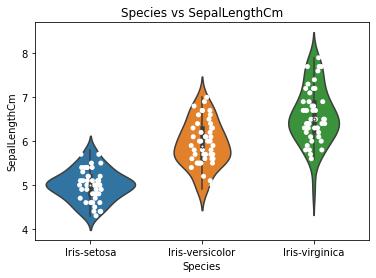

In [31]:
plot_iris('SepalLengthCm')

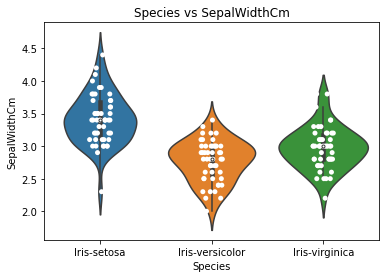

In [32]:
plot_iris('SepalWidthCm')

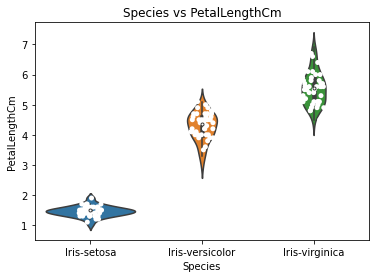

In [33]:
plot_iris('PetalLengthCm')

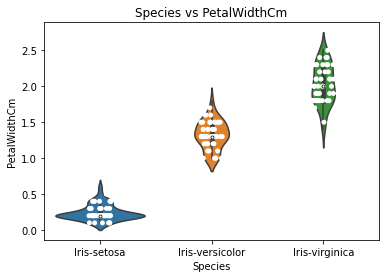

In [34]:
plot_iris('PetalWidthCm')

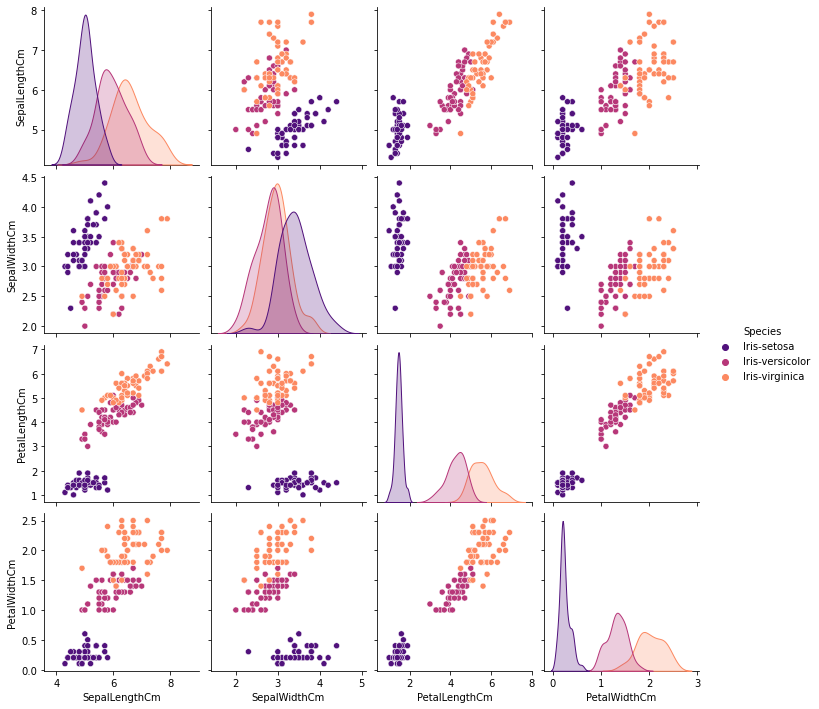

In [35]:
sns.pairplot(iris,hue='Species',palette='magma')


<AxesSubplot:>

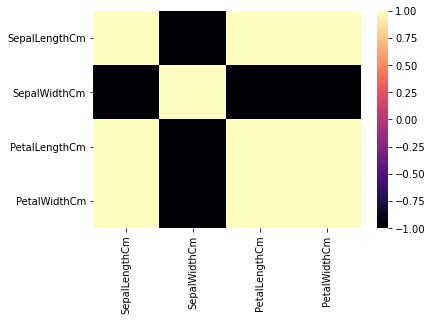

In [79]:
iris = iris.corr()
sns.heatmap(iris,cmap = 'magma')

# DECISION TREE CREATION

In [36]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [55]:
X_train.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,5.7,2.8,4.5,1.3
139,6.9,3.1,5.4,2.1
149,5.9,3.0,5.1,1.8
13,4.3,3.0,1.1,0.1
103,6.3,2.9,5.6,1.8


In [56]:
y_train.sample(5)

55     Iris-versicolor
58     Iris-versicolor
75     Iris-versicolor
0          Iris-setosa
138     Iris-virginica
Name: Species, dtype: object

In [57]:
from sklearn import tree
from sklearn import metrics
model = tree.DecisionTreeClassifier().fit(X_train,y_train)

Training Score : 1.0
Predictions are :  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


Accuracy Score : 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iri

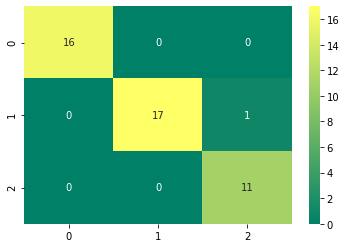

In [58]:
print('Training Score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
print('Predictions are : ',y_pred)
print('\n')
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : {}'.format(accuracy_score))
print('Recall :{}'.format(metrics.recall_score(y_test,y_pred,average='macro')))
print('Precision :{}'.format(metrics.precision_score(y_test,y_pred,average='macro')))
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True,cmap = 'summer'))


# PLOTTING DECISION TREE

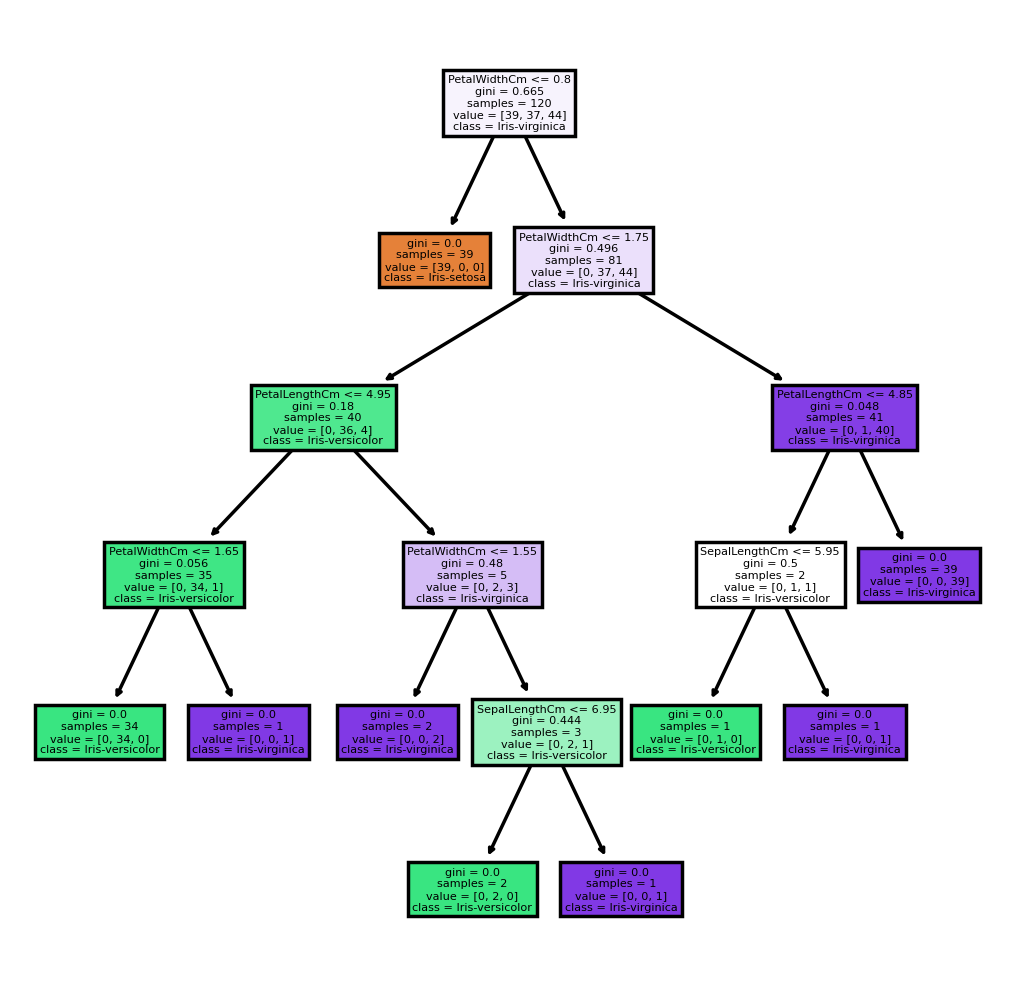

In [46]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
fig.savefig('IrisTree.png')

In [53]:
df = pd.DataFrame({'y_true': y_test,
        'y_Predicted': y_pred})
df.reset_index(inplace = True, drop = True)
df.sample(10)

,y_true,y_Predicted
17,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
12,Iris-versicolor,Iris-versicolor
10,Iris-virginica,Iris-virginica
28,Iris-versicolor,Iris-versicolor
16,Iris-versicolor,Iris-versicolor
22,Iris-setosa,Iris-setosa
13,Iris-versicolor,Iris-versicolor
1,Iris-versicolor,Iris-versicolor


# HYPERTUNING

In [59]:
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
parameters = {'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}
grid_model = GridSearchCV(model,param_grid=parameters,cv= 3,verbose = 2,n_jobs = -1).fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\abiz1\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.6952381  0.93333333 0.96190476 0.95238095 0.96190476
 0.95238095 0.96190476 0.94285714 0.95238095]
  warnings.warn(


In [60]:
grid_model.best_params_

{'max_leaf_nodes': 4}

Train set score is 0.9809523809523809
Accuracy is 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
AxesSubplot(0.125,0.125;0.62x0.755)


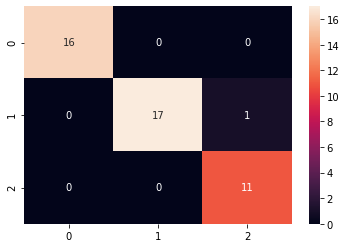

In [61]:
prediction = grid_model.predict(X_test)
print("Train set score is",grid_model.score(X_train,y_train))
print("Accuracy is",metrics.accuracy_score(y_test,prediction))
print('Recall :{}'.format(metrics.recall_score(y_test,prediction,average='macro')))
print('Precision :{}'.format(metrics.precision_score(y_test,prediction,average='macro')))
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))
print(sns.heatmap(metrics.confusion_matrix(y_test,prediction),annot = True))

# CONCLUSION

The Test Score is about 98%. I have also performed GridSearchCV to find the best parameters for the Decision Tree.
Thank you!